In [4]:
import numpy as np

In [6]:
data = np.load('fruits_300.npy')

In [9]:
data.shape

(300, 100, 100)

In [10]:
import matplotlib.pyplot as plt

In [12]:
# plt.imshow()
data[0].shape

(100, 100)

In [18]:
data.max(), data.min()

(255, 1)

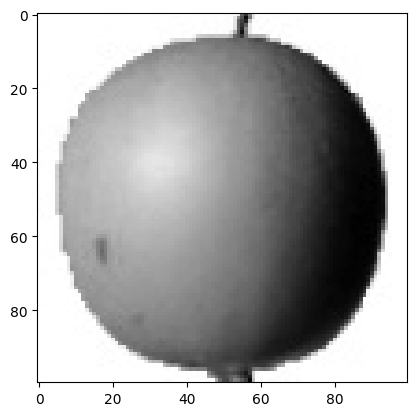

In [22]:
plt.imshow(data[0],cmap='gray_r')
plt.show()

In [23]:
# 10개씩 2줄  2 x 10 

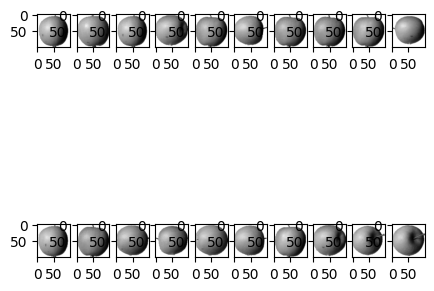

In [27]:
fig,ax =  plt.subplots(2,10, figsize=(5,5) )
for i in  range(20):
    ax[i//10,i % 10].imshow(data[i],cmap='gray_r')
#     ax[i//10,i % 10].xticks([]); ax[i//10,i % 10].yticks([])
    plt.xticks
plt.show()    

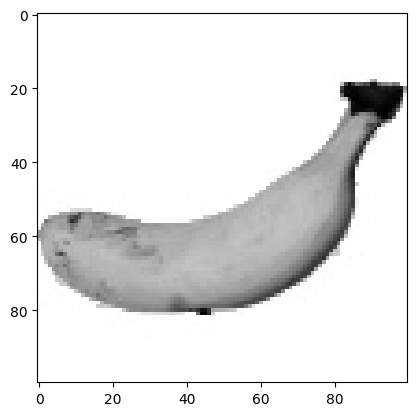

In [28]:
plt.imshow(data[-1],cmap='gray_r')
plt.show()

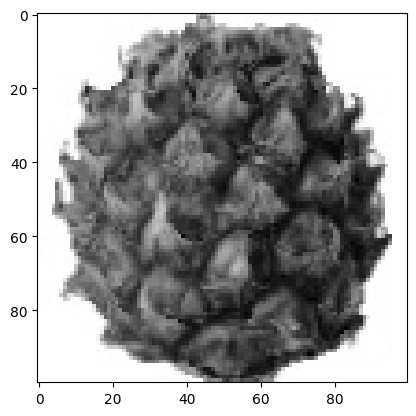

In [29]:
plt.imshow(data[100],cmap='gray_r')
plt.show()

In [30]:
# 사과 100개 파인애플 100개 바나나 100 개의 이미지  --> 수치데이터로 변경

In [32]:
# 차원 변경
# 1차원으로 변경
# 각 이미지에 해당하는 평균 값을 구하고 다시 이미지화 하면... 

In [41]:
data[0].flatten().shape

(10000,)

In [44]:
data[0].reshape(-1,)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [49]:
apple = data[:100].reshape(100,-1)
pineapple = data[100:200].reshape(100,-1)
banana = data[200:].reshape(100,-1)
apple.shape, pineapple.shape, banana.shape

((100, 10000), (100, 10000), (100, 10000))

In [54]:
apple_mean =  apple.mean(axis=0)
pineapple_mean =  pineapple.mean(axis=0)
banana_mean =  banana.mean(axis=0)

In [56]:
apple_mean = data[:100].mean(axis=0)
pineapple_mean = data[100:200].mean(axis=0)
banana_mean = data[200:].mean(axis=0)

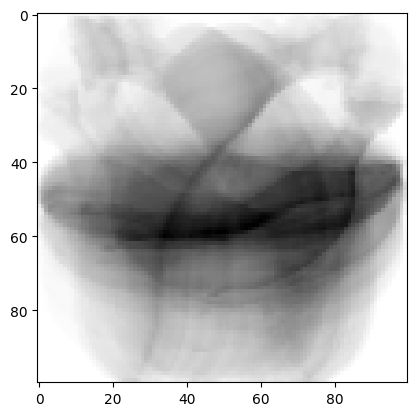

In [61]:
plt.imshow(banana_mean,cmap='gray_r')

In [62]:
# 평균 이미지와 실제 이미지를 비교해서 분류작업

In [66]:
data - apple_mean

numpy.ndarray

In [67]:
data.shape, apple_mean.shape

((300, 100, 100), (100, 100))

In [71]:
temp = (np.abs(data - apple_mean)).mean(axis=(1,2))
temp.shape

(300,)

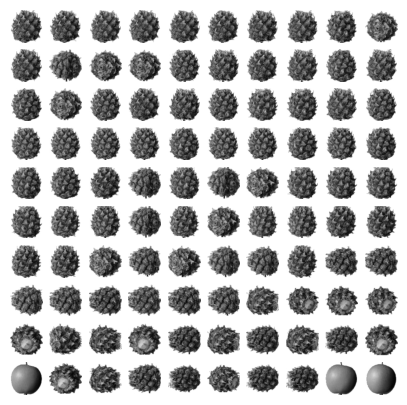

In [108]:
temp = np.abs(data - pineapple_mean).mean(axis=(1,2))
idx = temp.argsort()[:100]
data[idx]
fig, ax = plt.subplots(10,10,figsize=(5,5))
for i in range(100):
    ax[i//10,i%10].imshow(data[idx][i],cmap='gray_r')
    ax[i//10,i%10].axis('off')
plt.show()    

In [90]:
from sklearn.cluster import KMeans

In [93]:
km = KMeans(n_clusters=3,random_state=42)

In [96]:
# data - > 2차원으로 변경해서
data_2d = data.reshape(300 ,-1 )
data_2d = data.reshape(-1,100*100)
km.fit(data_2d)

KMeans(n_clusters=3, random_state=42)

In [101]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))

In [102]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# km이 분류한 이미지들중에 라벨이 0인 이미지들을 시각화


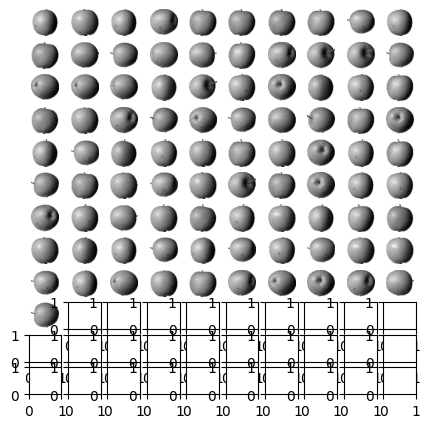

In [110]:
data_111 =  data[km.labels_ == 2]
fig, ax = plt.subplots(12,10,figsize=(5,5))
for i in range(len(data_111)):
    ax[i//10,i%10].imshow(data_111[i],cmap='gray_r')
    ax[i//10,i%10].axis('off')
plt.show()  

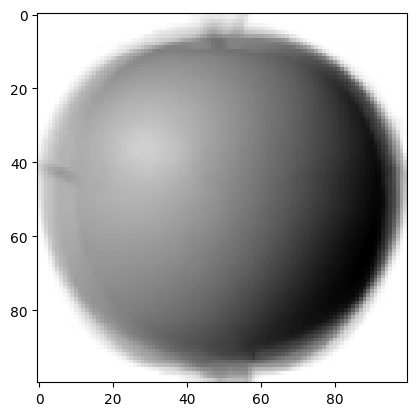

In [128]:
plt.imshow(km.cluster_centers_.reshape(3,100,100)[2],cmap='gray_r')
# km.cluster_centers_.reshape(3,100,100)[0]

In [131]:
# 최적의 군집의 개수
km.inertia_

5074977316.088372

In [ ]:
# 클러스터의 개수를 1 ~ 10까지 늘리면서 inertia_ 값의 형태를 확인
# 오차제곱합 최소가 될수록 클러스터의 중심을 결정..
# 클러스터가 1 

In [136]:
# help(KMeans)

In [138]:
result = []
for i in range(1,10):
    km = KMeans(n_clusters=i,random_state=42)
    # data - > 2차원으로 변경해서
    data_2d = data.reshape(300 ,-1 )
    data_2d = data.reshape(-1,100*100)
    km.fit(data_2d)
    result.append(km.inertia_)

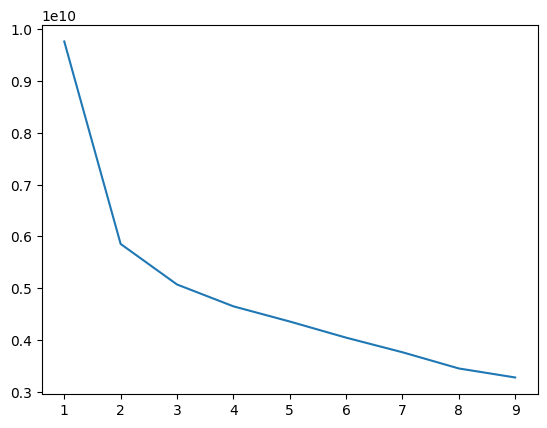

In [139]:
plt.plot(range(1,10),result)

In [141]:
data_2d.shape

(300, 10000)

In [145]:
km = KMeans(n_clusters=3,random_state=42)
km.fit(data_2d)
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [147]:
# data_2d[km.labels_ == 2].shape

(91, 10000)

In [148]:
# 방금한거를.. 
from sklearn.neighbors import KNeighborsClassifier

In [178]:
kn =  KNeighborsClassifier(n_neighbors=3)

In [184]:
X = data_2d

In [186]:
Y = [0]*100+[1]*100+[2]*100

In [188]:
X.shape, len(Y)

((300, 10000), 300)

In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
x_train,x_test,y_train,y_test =  train_test_split(X_scaled,Y, random_state=42)

In [193]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [194]:
kn.score(x_test,y_test)

0.9866666666666667

In [227]:
km = KMeans(n_clusters=3,random_state=25)
km.fit(x_train)

KMeans(n_clusters=3, random_state=25)

In [228]:
km.predict(x_test), y_test
(km.predict(x_test) == y_test).mean()

0.0

In [230]:
data_2d.shape

(300, 10000)

In [231]:
# 주성분 분석
from sklearn.decomposition import PCA

In [257]:
pca =  PCA(n_components=25)

In [258]:
data_2d_pca =  pca.fit_transform(data_2d)

In [259]:
data_2d.shape, data_2d_pca.shape

((300, 10000), (300, 25))

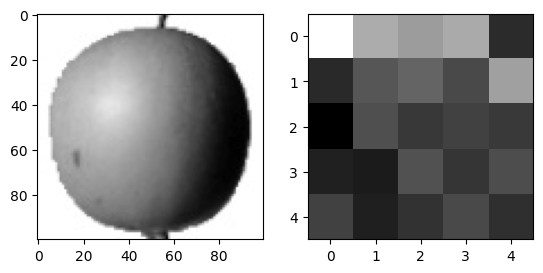

In [261]:
data_2d[0], data_2d_pca[0]
fig, ax = plt.subplots(1,2)
ax[0].imshow(data_2d[0].reshape(100,100),cmap = 'gray_r')
ax[1].imshow(data_2d_pca[0].reshape(5,5),cmap = 'gray_r')


In [250]:
pca.components_.shape

(100, 10000)

In [262]:
data_2d_inverse =  pca.inverse_transform(data_2d_pca)

In [263]:
data_2d_inverse.shape

(300, 10000)

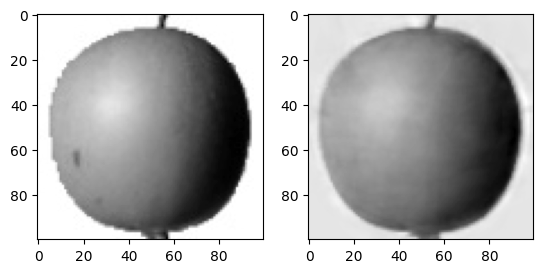

In [264]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(data_2d[0].reshape(100,100),cmap = 'gray_r')
ax[1].imshow(data_2d_inverse[0].reshape(100,100),cmap = 'gray_r')

In [265]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

In [268]:
# 데이터
# 로지스틱 회귀   , cross_validation을 이용해서 성능 측정

(300, 10000)

In [276]:
lr =  LogisticRegression()

In [277]:
from sklearn.model_selection import cross_validate

In [281]:
# 원본
lr =  LogisticRegression()
scores = cross_validate(lr, X, Y)
scores['test_score'].mean(), scores['fit_time'].mean()

(0.9966666666666667, 0.49261770248413084)

In [282]:
#원본 - 스케일
lr =  LogisticRegression()
scores = cross_validate(lr, X_scaled, Y)
scores['test_score'].mean(), scores['fit_time'].mean()

(1.0, 0.41132364273071287)

In [301]:
# 원본 - 차원 축소
print(data_2d.shape)
pca =  PCA()
data_2d_pca = pca.fit_transform(data_2d)
print(pca.n_components_)
print(pca.n_components)
lr =  LogisticRegression()
scores = cross_validate(lr, data_2d_pca, Y)
scores['test_score'].mean(), scores['fit_time'].mean()

(300, 10000)
300
None


(1.0, 0.03291187286376953)

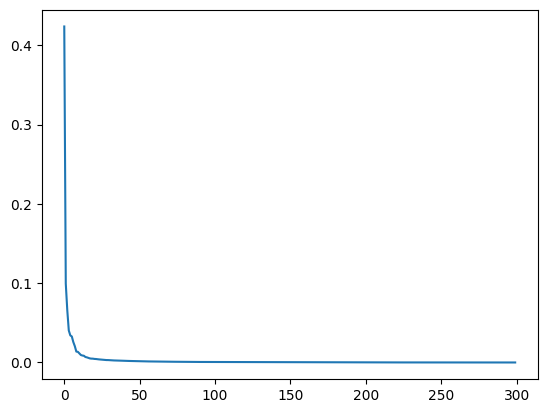

In [311]:
plt.plot( pca.explained_variance_ratio_)
plt.show()

In [309]:
np.log10( pca.explained_variance_ratio_)

array([ -0.37307463,  -1.00253692,  -1.18191516,  -1.39456872,
        -1.46637089,  -1.48395029,  -1.58951522,  -1.68719603,
        -1.86255841,  -1.87199746,  -1.93849241,  -2.024754  ,
        -2.05639091,  -2.07227179,  -2.15923589,  -2.19031334,
        -2.23739953,  -2.2914066 ,  -2.31302071,  -2.31844406,
        -2.34887862,  -2.35920048,  -2.38929365,  -2.40951326,
        -2.42893226,  -2.44454799,  -2.47953855,  -2.49775728,
        -2.51661271,  -2.51742   ,  -2.5391579 ,  -2.55919282,
        -2.57667928,  -2.59176311,  -2.59819305,  -2.60641657,
        -2.62019622,  -2.63605828,  -2.65287832,  -2.66323294,
        -2.66900544,  -2.70534016,  -2.71314344,  -2.71734552,
        -2.73029994,  -2.73570894,  -2.75722869,  -2.76749485,
        -2.78285454,  -2.78578926,  -2.79434578,  -2.82443572,
        -2.83582623,  -2.85214514,  -2.86263081,  -2.87195646,
        -2.88063567,  -2.8847128 ,  -2.89643521,  -2.9029794 ,
        -2.91316411,  -2.91627658,  -2.93699464,  -2.94

In [313]:
# 차원축소한 데이터를 kmean에 대입해서 잘 군집화를 이루는지 확인
pca =  PCA(n_components=2)
data_2d_pca = pca.fit_transform(data_2d)
data_2d_pca.shape

(300, 2)

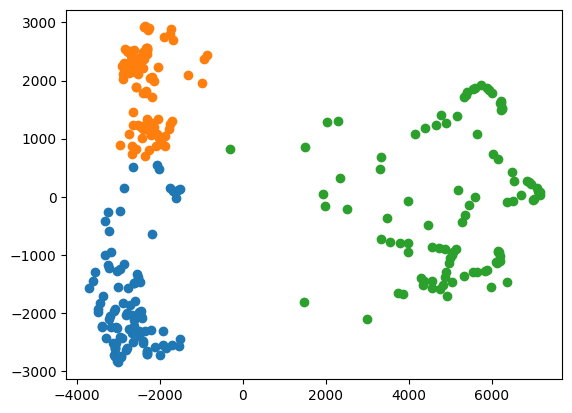

In [317]:
plt.scatter(x = data_2d_pca[:100][:,0],y = data_2d_pca[:100][:,1])
plt.scatter(x = data_2d_pca[100:200][:,0],y = data_2d_pca[100:200][:,1])
plt.scatter(x = data_2d_pca[200:][:,0],y = data_2d_pca[200:][:,1])

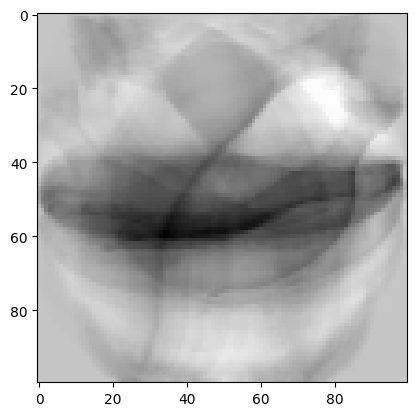

In [322]:
plt.imshow(pca.inverse_transform(data_2d_pca[200]).reshape(100,100),cmap='gray_r')

In [323]:
km =  KMeans(n_clusters=3,random_state=42)

In [324]:
km.fit(data_2d_pca)

KMeans(n_clusters=3, random_state=42)

In [325]:
np.unique( km.labels_,return_counts=True)

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))

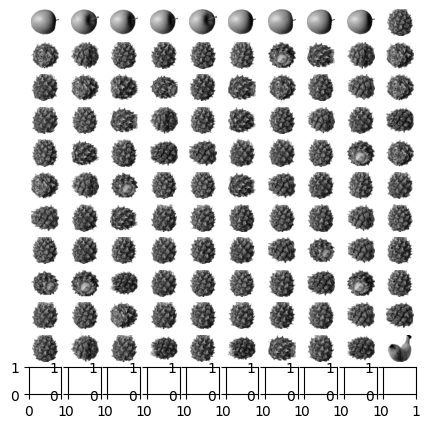

In [326]:
data_111 =  data[km.labels_ == 0]
fig, ax = plt.subplots(12,10,figsize=(5,5))
for i in range(len(data_111)):
    ax[i//10,i%10].imshow(data_111[i],cmap='gray_r')
    ax[i//10,i%10].axis('off')
plt.show()  